# IMPORT LIBRARY


In [63]:
import pandas as pd # untuk urusan per-csv-an 
import matplotlib.pyplot as plt # untuk visualisasi data 
import numpy as np # untuk perhitungan-perhitungan 
import seaborn as sns # untuk visualisasi data lanjutan 
from sklearn.preprocessing import StandardScaler # untuk scaling 
from sklearn.cluster import AgglomerativeClustering # untuk Agglomerative Clustering
from scipy.cluster.hierarchy import dendrogram, linkage # untuk membuat dendrogram 
from sklearn.cluster import KMeans # untuk KMeans Clustering 

# Mengambil Dataset

In [71]:
dataset = pd.read_csv('covid_vaccine_statewise.csv') #read "covid_vaccine_statewise.csv"
dataset.head() # lihat 5 record awal

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [72]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Updated On                           7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [73]:
dataset.isna().sum()

Updated On                                0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [76]:
# import library untuk data cleaning
from sklearn.impute import SimpleImputer

# membuat variabel yang berisi strategi simple imputer
mean = SimpleImputer(strategy='mean')
df2 = dataset.copy()

# mengisi data NaN dari tiap tiap record
df2['Total Doses Administered'] = mean.fit_transform(df2[['Total Doses Administered']])
df2['Sessions'] = mean.fit_transform(df2[['Sessions']])
df2[' Sites '] = mean.fit_transform(df2[[' Sites ']])
df2['First Dose Administered'] = mean.fit_transform(df2[['First Dose Administered']])
df2['Second Dose Administered'] = mean.fit_transform(df2[['Second Dose Administered']])
df2['Male (Doses Administered)'] = mean.fit_transform(df2[['Male (Doses Administered)']])
df2['Female (Doses Administered)'] = mean.fit_transform(df2[['Female (Doses Administered)']])
df2['Transgender (Doses Administered)'] = mean.fit_transform(df2[['Transgender (Doses Administered)']])
df2[' Covaxin (Doses Administered)'] = mean.fit_transform(df2[[' Covaxin (Doses Administered)']])
df2['CoviShield (Doses Administered)'] = mean.fit_transform(df2[['Total Doses Administered']])
df2['Sputnik V (Doses Administered)'] = mean.fit_transform(df2[['CoviShield (Doses Administered)']])
df2['AEFI'] = mean.fit_transform(df2[['AEFI']])
df2['18-44 Years (Doses Administered)'] = mean.fit_transform(df2[['18-44 Years (Doses Administered)']])
df2['45-60 Years (Doses Administered)'] = mean.fit_transform(df2[['45-60 Years (Doses Administered)']])
df2['60+ Years (Doses Administered)'] = mean.fit_transform(df2[['60+ Years (Doses Administered)']])
df2['18-44 Years(Individuals Vaccinated)'] = mean.fit_transform(df2[['18-44 Years(Individuals Vaccinated)']])
df2['45-60 Years(Individuals Vaccinated)'] = mean.fit_transform(df2[['45-60 Years(Individuals Vaccinated)']])
df2['60+ Years(Individuals Vaccinated)'] = mean.fit_transform(df2[['60+ Years(Individuals Vaccinated)']])
df2['Male(Individuals Vaccinated)'] = mean.fit_transform(df2[['Male(Individuals Vaccinated)']])
df2['Female(Individuals Vaccinated)'] = mean.fit_transform(df2[['Female(Individuals Vaccinated)']])
df2['Transgender(Individuals Vaccinated)'] = mean.fit_transform(df2[['Transgender(Individuals Vaccinated)']])
df2['Total Individuals Vaccinated'] = mean.fit_transform(df2[['Total Individuals Vaccinated']])

# cek jumlah NaN tiap tiap atribut
df2.isna().sum()

Updated On                             0
State                                  0
Total Doses Administered               0
Sessions                               0
 Sites                                 0
First Dose Administered                0
Second Dose Administered               0
Male (Doses Administered)              0
Female (Doses Administered)            0
Transgender (Doses Administered)       0
 Covaxin (Doses Administered)          0
CoviShield (Doses Administered)        0
Sputnik V (Doses Administered)         0
AEFI                                   0
18-44 Years (Doses Administered)       0
45-60 Years (Doses Administered)       0
60+ Years (Doses Administered)         0
18-44 Years(Individuals Vaccinated)    0
45-60 Years(Individuals Vaccinated)    0
60+ Years(Individuals Vaccinated)      0
Male(Individuals Vaccinated)           0
Female(Individuals Vaccinated)         0
Transgender(Individuals Vaccinated)    0
Total Individuals Vaccinated           0
dtype: int64

In [89]:
dataset_subset = df2[['Sputnik V (Doses Administered)','Second Dose Administered']] # Subset data
plt.show()

ss = StandardScaler() # jadikan StandartScaler() sebagai variabel
scaled = ss.fit_transform(dataset_subset) # Scale data

# AGGLOMERATIVE CLUSTERING 

In [90]:
# membuat objek dari AgglomerativeClustering dengan jumlah cluster 5
pembagian = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')

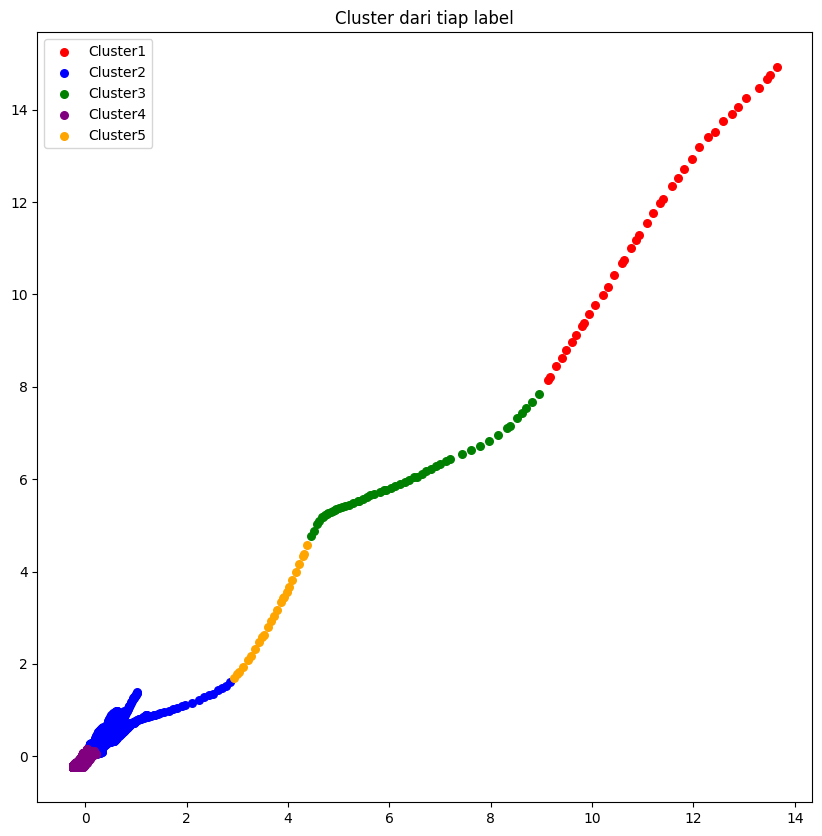

In [95]:
agglomerative = pembagian.fit_predict(scaled)


plt.figure(figsize=(10,10)) #visualisasi cluster

# buat data poin 
plt.scatter(scaled[agglomerative==0, 0],scaled[agglomerative==0, 1], s=30, c='red', label ='Cluster1')
plt.scatter(scaled[agglomerative==1, 0],scaled[agglomerative==1, 1], s=30, c='blue', label ='Cluster2')
plt.scatter(scaled[agglomerative==2, 0],scaled[agglomerative==2, 1], s=30, c='green', label ='Cluster3')
plt.scatter(scaled[agglomerative==3, 0],scaled[agglomerative==3, 1], s=30, c='purple', label ='Cluster4')
plt.scatter(scaled[agglomerative==4, 0],scaled[agglomerative==4, 1], s=30, c='orange', label ='Cluster5')

# buat judul, legend, dan menampilkan visualisasi nya 
plt.title("Cluster dari tiap label")
plt.legend()
plt.show()

# DENDROGRAM

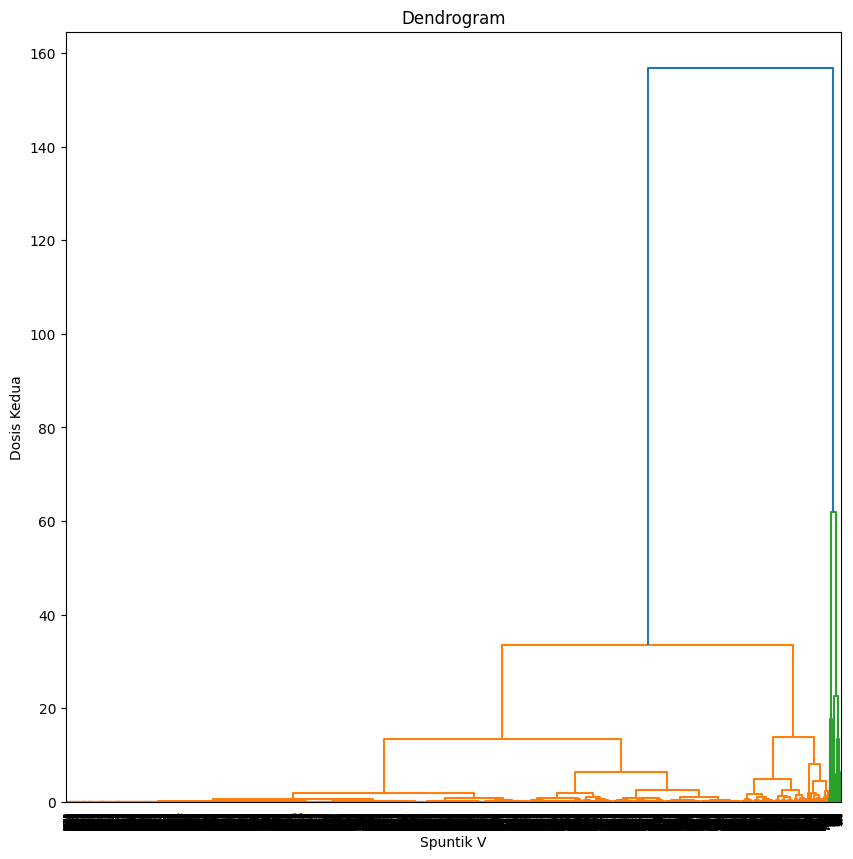

In [94]:
hr_linkage = linkage(scaled, method='ward')

plt.figure(figsize=(10,10))
dendrogram(hr_linkage)
plt.title("Dendrogram")
plt.xlabel("Spuntik V")
plt.ylabel("Dosis Kedua")
plt.show()

# KMean Clustering

In [96]:
points = df2[['Sputnik V (Doses Administered)','Second Dose Administered']]
points = points.values

In [97]:
model = KMeans(n_clusters=3) # Buat objek dari k means dengan jumlah cluster 3
model.fit(points) # fit terhadap model

y = model.fit_predict(points) # menentukan label untuk cluster
print(y)

[0 0 0 ... 0 0 0]


In [98]:
#menampung koordinat dari tiap centroid
centroid = model.cluster_centers_

centroid_x = centroid[:,0]
centroid_y = centroid[:,1]

In [99]:
centroid

array([[5.06607229e+06, 9.64277066e+05],
       [4.00325543e+08, 8.09262741e+07],
       [1.85679670e+08, 3.49126615e+07]])

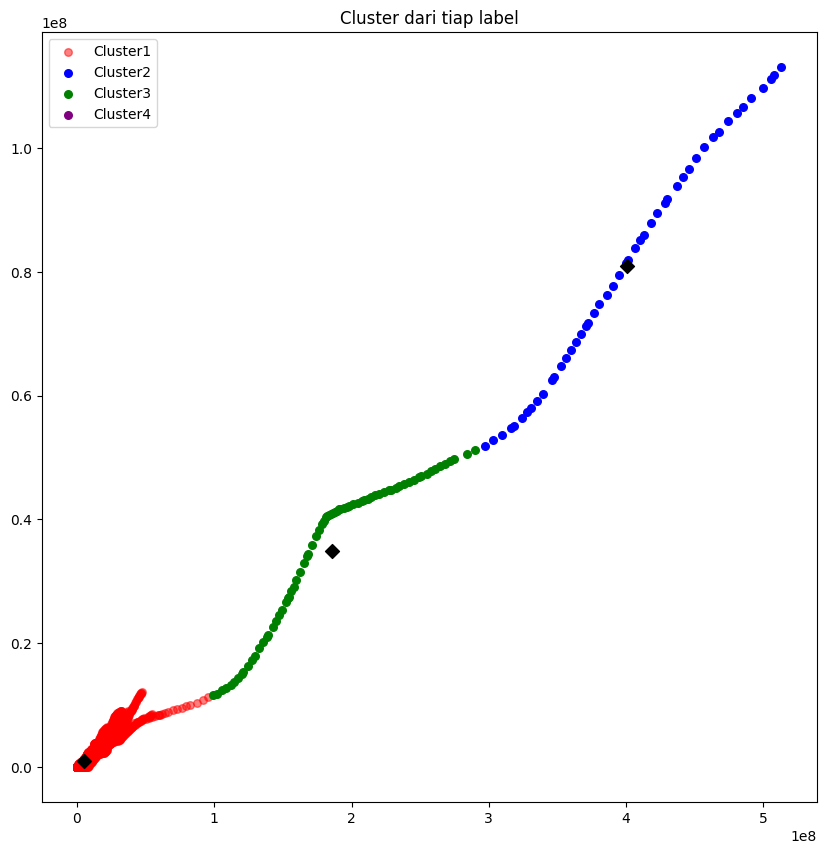

In [100]:
plt.figure(figsize=(10,10)) # visualisasi cluster

# buat data poin 
plt.scatter(points[y==0, 0],points[y==0, 1], s=30, c='red', label ='Cluster1', alpha=0.5)
plt.scatter(points[y==1, 0],points[y==1, 1], s=30, c='blue', label ='Cluster2')
plt.scatter(points[y==2, 0],points[y==2, 1], s=30, c='green', label ='Cluster3')
plt.scatter(points[y==3, 0],points[y==3, 1], s=30, c='purple', label ='Cluster4')

# buat centroid point
plt.scatter(centroid_x, centroid_y, marker='D', s=50 ,c='black')

# buat judul, legend, dan menampilkan visualisasi nya
plt.title("Cluster dari tiap label")
plt.legend()
plt.show()


In [101]:
cluster = range(1,7) #menentukan jumlah cluster
inertias = [] # inisialisasi inertia


for n in cluster :
    model = KMeans(n_clusters=n)
    model.fit(points)
    inertias.append(model.inertia_)

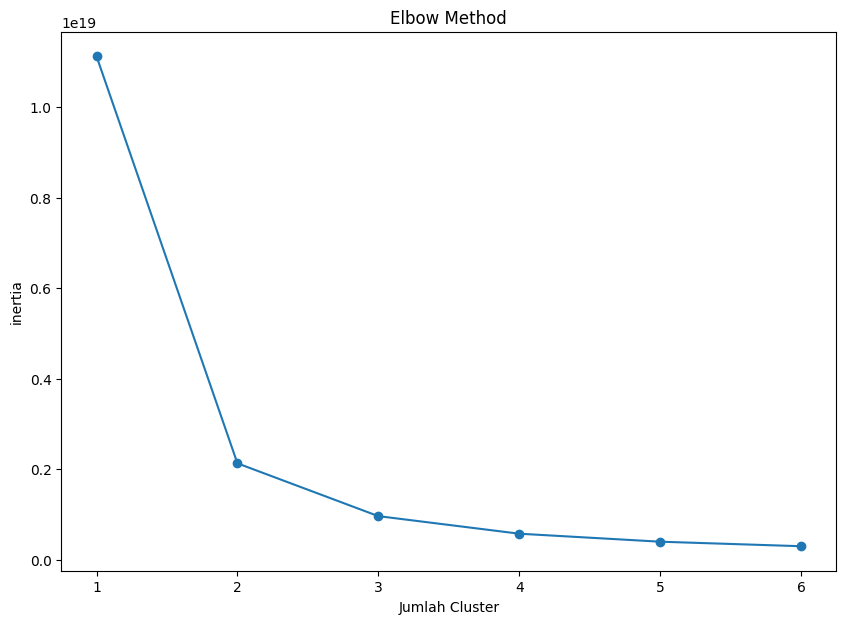

In [102]:
#plot ks vs inertias
plt.figure(figsize = (10,7))
plt.plot(cluster, inertias, '-o')
plt.xlabel("Jumlah Cluster")
plt.ylabel("inertia")
plt.title("Elbow Method")
plt.xticks(cluster)
plt.show()